In [ ]:
#@title Librerias

import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

# Diferenciación en Python usando Sympy

La librería `sympy` en Python facilita el trabajo con cálculo simbólico, incluyendo la diferenciación. A continuación, se muestra cómo usar `sympy` para realizar derivadas de expresiones simbólicas.

Para empezar, debemos importar la librería y definir las variables simbólicas que utilizarás:

```python
import sympy as sp

# Definimos una variable simbólica
x = sp.symbols('x')
```

## Derivación de Funciones

Sympy ofrece la función `diff` para calcular la derivada de una función con respecto a una variable. Aquí tienes algunos ejemplos:

### Ejemplo 1: Derivada de una función polinómica

Calculemos la derivada de $f(x) = x^2 + 3x + 2$.

El resultado será:

$$
f'(x) = 2x + 3
$$







In [ ]:
# Definimos una variable simbólica
x = sp.symbols('x')
# Definimos la función
f = x**2 + 3*x + 2

# Calculamos la derivada con respecto a x
f_prime = sp.diff(f, x)
f_prime

2*x + 3

In [ ]:
# Otra forma de hacer la derivada con respecto a x
f.diff(x)

2*x + 3

### Ejemplo 2: Derivada de una función exponencial

Ahora, derivemos la función $g(x) = e^x \cdot \sin(x)$.

La derivada de será:

$$
g'(x) = e^x \cdot \sin(x) + e^x \cdot \cos(x)
$$

In [ ]:
# Definimos la función
g = sp.exp(x) * sp.sin(x)

# Calculamos la derivada
g_prime = sp.diff(g, x)
g_prime

exp(x)*sin(x) + exp(x)*cos(x)

## Derivadas de Orden Superior

Podemos obtener derivadas de cualquier orden usando `diff`, especificando el orden como un tercer argumento. Por ejemplo, para calcular la segunda derivada de $f(x) = x^3$ con respecto a $x$:


El resultado será:

$$
f''(x) = 6x
$$


In [ ]:
# Definimos la función
h = x**3

# Calculamos la segunda derivada
h_second = sp.diff(h, x, 2)
h_second

6*x

## Derivación con Varias Variables

Para funciones de varias variables, debemos definir cada una de las variables simbólicas y usar `diff` con respecto a cada una. Veamos un ejemplo con $f(x, y) = x^2 y + y^3$:

Las derivadas parciales son:

$$
\frac{\partial f}{\partial x} = 2xy
$$

$$
\frac{\partial f}{\partial y} = x^2 + 3y^2
$$

In [ ]:
# Definimos las variables
x, y = sp.symbols('x y')

# Definimos la función
f = x**2 * y + y**3

# Derivada parcial con respecto a x
f_x = sp.diff(f, x)

# Derivada parcial con respecto a y
f_y = sp.diff(f, y)

display(f_x)
display(f_y)

2*x*y

x**2 + 3*y**2

# Diferencias Finitas Numéricas

Las diferencias finitas son un método numérico para aproximar derivadas de funciones en puntos discretos. Es una técnica utilizada ampliamente en problemas de cálculo numérico y ecuaciones diferenciales, cuando las soluciones analíticas no están disponibles o son difíciles de obtener.

## Fundamento de las Diferencias Finitas

La idea central de las diferencias finitas es reemplazar las derivadas por diferencias de valores de la función en puntos discretos. Consideremos una función $f(x)$ evaluada en puntos igualmente espaciados $x_0, x_1, x_2, \dots$, separados por una distancia $h$ (el paso de discretización).

### Diferencia Hacia Adelante

La **diferencia finita hacia adelante** aproxima la primera derivada de $f(x)$ en un punto $x_i$ usando el siguiente cálculo:

$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_i)}{h} + \mathcal{O}(h)
$$

donde $h$ es el paso entre puntos y $\mathcal{O}(h)$ representa el error de truncamiento, que es del orden de $h$. Esto significa que el error disminuye linealmente conforme se reduce el tamaño de $h$.

### Diferencia Hacia Atrás

La **diferencia finita hacia atrás** utiliza el valor del punto anterior para aproximar la derivada en $x_i$:

$$
f'(x_i) \approx \frac{f(x_i) - f(x_{i-1})}{h} + \mathcal{O}(h)
$$

Aquí también el error de truncamiento es del orden de $h$.

### Diferencia Centrada

La **diferencia finita centrada** utiliza los valores de la función en los puntos a ambos lados de $x_i$:

$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_{i-1})}{2h} + \mathcal{O}(h^2)
$$

Esta aproximación es de segundo orden en $h$, es decir, el error de truncamiento es $\mathcal{O}(h^2)$, lo que la hace generalmente más precisa que las diferencias hacia adelante o hacia atrás.





In [ ]:
def forward_diff(f, x, h):
  '''
  Aproxima la primera derivada de f en x usando la diferencia finita hacia adelante.
  f: función
  x: punto en el que se quiere calcular la derivada
  h: paso de discretización
  return: primera derivada de f en x
  '''
  return (f(x + h) - f(x)) / h

def backward_diff(f, x, h):
  '''
  Aproxima la primera derivada de f en x usando la diferencia finita hacia atrás.
  f: función
  x: punto en el que se quiere calcular la derivada
  h: paso de discretización
  return: primera derivada de f en x
  '''
  return (f(x) - f(x - h)) / h

def centered_diff(f, x, h):
  '''
  Aproxima la primera derivada de f en x usando la diferencia finita centrada.
  f: función
  x: punto en el que se quiere calcular la derivada
  h: paso de discretización
  return: primera derivada de f en x
  '''
  return (f(x + h) - f(x - h)) / (2 * h)

In [ ]:
f = lambda x: x**2
x = np.linspace(0, 10, 100)
h = 0.01
df_c = centered_diff(f, x, h)
df_f = forward_diff(f, x, h)
df_b = backward_diff(f, x, h)

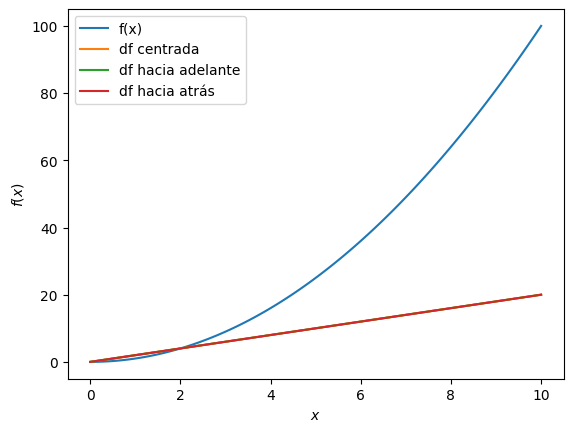

In [ ]:
plt.plot(x, f(x), label='f(x)')
plt.plot(x, df_c, label='df centrada')
plt.plot(x, df_f, label='df hacia adelante')
plt.plot(x, df_b, label='df hacia atrás')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.show()

In [ ]:
t = sp.symbols('t')
y = 10*sp.log(t**2+t+1)/(10*t**3-20*t**2+t-2)
dy = y.diff(t)
print('Función')
display(y)
print('\nDerivada')
display(dy)

Función


10*log(t**2 + t + 1)/(10*t**3 - 20*t**2 + t - 2)


Derivada


10*(2*t + 1)/((t**2 + t + 1)*(10*t**3 - 20*t**2 + t - 2)) + 10*(-30*t**2 + 40*t - 1)*log(t**2 + t + 1)/(10*t**3 - 20*t**2 + t - 2)**2

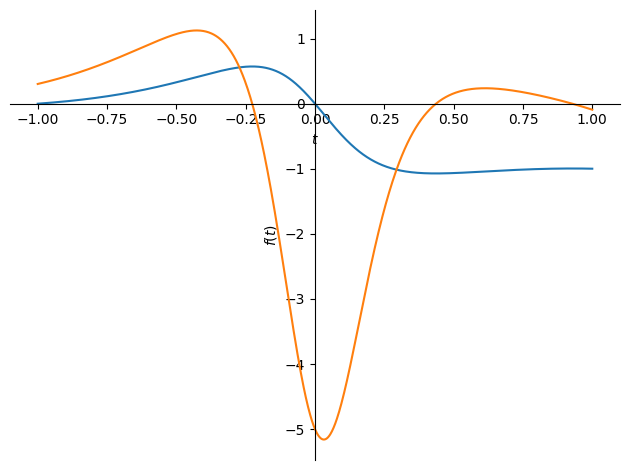

In [ ]:
# Gráfico de las funciones Sympy
sp.plot(y, dy, (t, -1, 1))
plt.show()

In [ ]:
# Funciones numpy
y = sp.lambdify(t, y)
dy = sp.lambdify(t, dy)

In [ ]:
t = np.linspace(-1, 1, 100)
h = 0.01
dy_c = centered_diff(y, t, h)
dy_f = forward_diff(y, t, h)
dy_b = backward_diff(y, t, h)

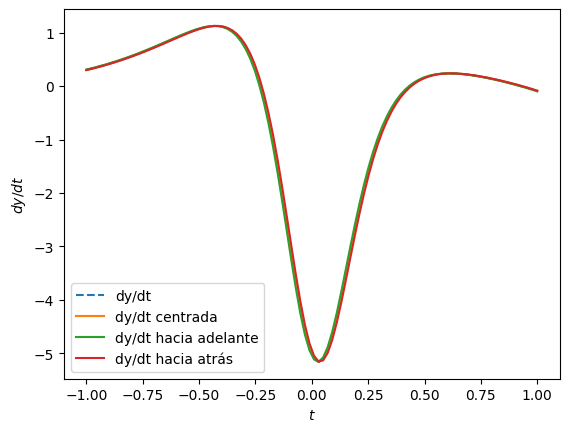

In [ ]:
plt.plot(t, dy(t), '--', label='dy/dt')
plt.plot(t, dy_c, label='dy/dt centrada')
plt.plot(t, dy_f, label='dy/dt hacia adelante')
plt.plot(t, dy_b, label='dy/dt hacia atrás')
plt.xlabel('$t$')
plt.ylabel('$dy/dt$')
plt.legend()
plt.show()

## Segunda Derivada con Diferencias Finitas

Para aproximar la segunda derivada de $f(x)$ en un punto $x_i$, se puede utilizar la siguiente fórmula de **diferencia finita centrada**:

$$
f''(x_i) \approx \frac{f(x_{i+1}) - 2f(x_i) + f(x_{i-1})}{h^2} + \mathcal{O}(h^2)
$$

Esta es una aproximación de segundo orden en $h$, ya que el error de truncamiento es $\mathcal{O}(h^2)$. Este esquema es común en la solución de ecuaciones diferenciales de segundo orden.

In [ ]:
def second_diff(f, x, h):
  '''
  Aproxima la segunda derivada de f en x usando la diferencia finita centrada.
  f: función
  x: punto en el que se quiere calcular la derivada
  h: paso de discretización
  return: segunda derivada de f en x
  '''
  return (f(x + h) - 2 * f(x) + f(x - h)) / (h**2)

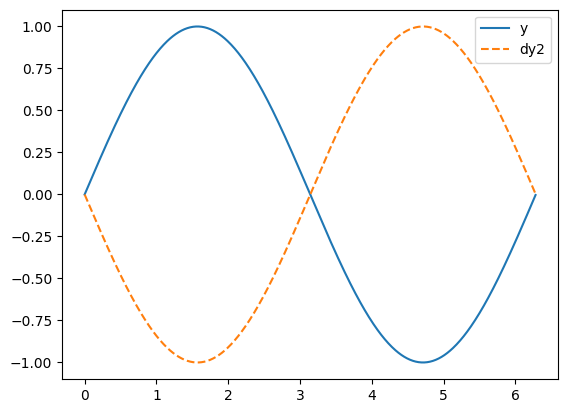

In [ ]:
h = 0.01
x = np.arange(0, 2*np.pi, h)
y = np.sin(x)
dy2 = second_diff(np.sin, x, h)
plt.plot(x, y, label='y')
plt.plot(x, dy2, '--', label='dy2')
plt.legend()
plt.show()

# Técnica de la Derivada de Tres Puntos (Three-Point Derivative)
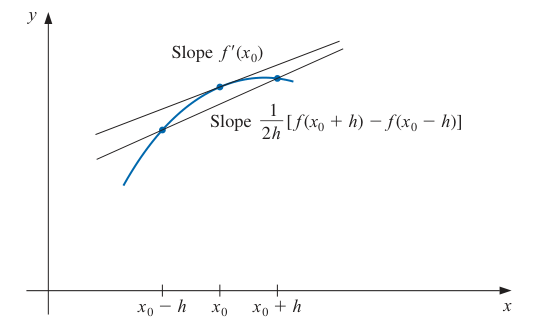


La técnica de la derivada de tres puntos, o **Three-Point Derivative**, es un método numérico que utiliza tres puntos consecutivos para aproximar la derivada de una función en un punto dado. Esta técnica es particularmente útil cuando queremos una aproximación más precisa que la obtenida mediante las diferencias finitas hacia adelante o hacia atrás.

## Fórmulas de Derivada de Tres Puntos

Dado un punto $x_i$ en una función $f(x)$ evaluada en puntos igualmente espaciados con distancia $h$, podemos calcular la derivada en $x_i$ con las siguientes fórmulas, dependiendo de si el punto es al principio, en el medio o al final del intervalo.

### Derivada Adelantada de Tres Puntos (Three-Point Forward Difference)

Para aproximar la derivada en el punto $x_i$, utilizando los valores $f(x_i)$, $f(x_{i+1})$ y $f(x_{i+2})$:

$$
f'(x_i) \approx \frac{-3f(x_i) + 4f(x_{i+1}) - f(x_{i+2})}{2h} + \mathcal{O}(h^2)
$$

Esta fórmula es de segundo orden en $h$, con un error de truncamiento de $\mathcal{O}(h^2)$.

### Derivada Centrada de Tres Puntos (Three-Point Centered Difference)

Para una aproximación centrada de la derivada en el punto $x_i$, utilizando los valores $f(x_{i-1})$, $f(x_i)$ y $f(x_{i+1})$:

$$
f'(x_i) \approx \frac{f(x_{i+1}) - f(x_{i-1})}{2h} + \mathcal{O}(h^2)
$$

Esta también es una aproximación de segundo orden en $h$ y es generalmente más precisa, ya que el error de truncamiento disminuye cuadráticamente con $h$.

### Derivada Atrasada de Tres Puntos (Three-Point Backward Difference)

Para calcular la derivada en el punto $x_i$, utilizando los valores $f(x_i)$, $f(x_{i-1})$ y $f(x_{i-2})$:

$$
f'(x_i) \approx \frac{3f(x_i) - 4f(x_{i-1}) + f(x_{i-2})}{2h} + \mathcal{O}(h^2)
$$

Esta fórmula también tiene un error de truncamiento de $\mathcal{O}(h^2)$.



In [ ]:
def three_point_derivative(f, x, h):
    """
    Calcula la derivada de tres puntos para una función f en un conjunto de puntos x con paso h.

    Parámetros:
    - f: función a derivar.
    - x: array de puntos donde evaluar la derivada.
    - h: paso entre puntos en el array x.

    Retorna:
    - Array de las derivadas aproximadas en cada punto de x.
    """
    n = len(x)  # Número de puntos
    derivative = np.zeros_like(x)  # Array para almacenar las derivadas

    for i in range(n):
        if i == 0:
            # Derivada adelantada para el primer punto
            derivative[i] = (-3 * f(x[i]) + 4 * f(x[i] + h) - f(x[i] + 2 * h)) / (2 * h)
        elif i == n - 1:
            # Derivada atrasada para el último punto
            derivative[i] = (3 * f(x[i]) - 4 * f(x[i] - h) + f(x[i] - 2 * h)) / (2 * h)
        else:
            # Derivada centrada para los puntos intermedios
            derivative[i] = (f(x[i] + h) - f(x[i] - h)) / (2 * h)

    return derivative


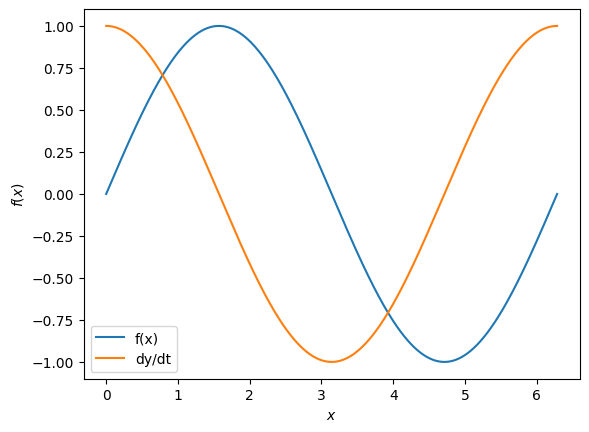

In [ ]:
h = 0.001  # Paso entre puntos
x = np.arange(0, 2 * np.pi, h)  # Puntos en el intervalo [0, 2*pi]
y = lambda x: np.sin(x) # Función

dy_f = three_point_derivative(y, x, h)
plt.plot(x, y(x), label='f(x)')
plt.plot(x, dy_f, label='dy/dt')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.show()

# Técnica de la Derivada de Cinco Puntos (Five-Point Derivative)

La técnica de la derivada de cinco puntos, o **Five-Point Derivative**, es un método numérico que utiliza cinco puntos consecutivos para aproximar la derivada de una función en un punto dado. Al utilizar más puntos, se obtiene una mayor precisión en la aproximación de la derivada, con un error de truncamiento de orden superior.

## Fórmulas de Derivada de Cinco Puntos

Dado un punto $x_i$ en una función $f(x)$ evaluada en puntos igualmente espaciados con una distancia $h$, podemos calcular la derivada en $x_i$ con las siguientes fórmulas, dependiendo de si el punto es al principio, en el medio o al final del intervalo.

### Derivada Adelantada de Cinco Puntos (Five-Point Forward Difference)

Para aproximar la derivada en el punto $x_i$, utilizando los valores $f(x_i)$, $f(x_{i+1})$, $f(x_{i+2})$, $f(x_{i+3})$ y $f(x_{i+4})$:

$$
f'(x_i) \approx \frac{-25f(x_i) + 48f(x_{i+1}) - 36f(x_{i+2}) + 16f(x_{i+3}) - 3f(x_{i+4})}{12h} + \mathcal{O}(h^4)
$$

Esta fórmula es de cuarto orden en $h$, con un error de truncamiento de $\mathcal{O}(h^4)$, lo cual la hace significativamente más precisa que las aproximaciones de orden inferior.

### Derivada Centrada de Cinco Puntos (Five-Point Centered Difference)

Para una aproximación centrada de la derivada en el punto $x_i$, utilizando los valores $f(x_{i-2})$, $f(x_{i-1})$, $f(x_{i+1})$, y $f(x_{i+2})$:

$$
f'(x_i) \approx \frac{f(x_{i-2}) - 8f(x_{i-1}) + 8f(x_{i+1}) - f(x_{i+2})}{12h} + \mathcal{O}(h^4)
$$

Esta aproximación también es de cuarto orden en $h$, lo cual la hace altamente precisa y preferible para puntos en el interior del dominio.

### Derivada Atrasada de Cinco Puntos (Five-Point Backward Difference)

Para calcular la derivada en el punto $x_i$, utilizando los valores $f(x_i)$, $f(x_{i-1})$, $f(x_{i-2})$, $f(x_{i-3})$, y $f(x_{i-4})$:

$$
f'(x_i) \approx \frac{25f(x_i) - 48f(x_{i-1}) + 36f(x_{i-2}) - 16f(x_{i-3}) + 3f(x_{i-4})}{12h} + \mathcal{O}(h^4)
$$

Esta fórmula también es de cuarto orden en $h$ y se utiliza cuando los puntos anteriores al punto de interés están disponibles.





# Cálculo de Derivadas Numéricas con `numpy.gradient` y `numpy.diff`

En `numpy`, los métodos `gradient` y `diff` son útiles para calcular derivadas numéricas en una secuencia de datos. A continuación, se explica cómo funciona cada uno de ellos y cómo se utilizan para aproximar derivadas.

## Método `numpy.gradient`

El método [`gradient`](https://numpy.org/doc/2.1/reference/generated/numpy.gradient.html) estima la derivada de una función en varios puntos usando diferencias finitas. Es especialmente útil cuando se tiene un conjunto de datos distribuidos uniformemente. `gradient` calcula una aproximación centrada para todos los puntos intermedios y utiliza diferencias hacia adelante y hacia atrás para los puntos en los bordes.

**Sintaxis:**

```python
numpy.gradient(f, *varargs, **kwargs)
```

**Parámetros:**
- `f`: Array de valores de la función.
- `*varargs`: (Opcional) Espaciado entre los puntos de la malla. Si se omite, se asume un espaciado de `1` entre puntos.
- `**kwargs`: Opciones adicionales, como el eje a lo largo del cual calcular el gradiente.

**Ejemplo:**

Si tenemos un conjunto de puntos $y = f(x)$ en un array `f` con un espaciado constante $h$, el gradiente en cada punto `f[i]` se aproxima a:

$$
f'(x) ≈ \frac{f(x + h) - f(x - h)}{2h}
$$






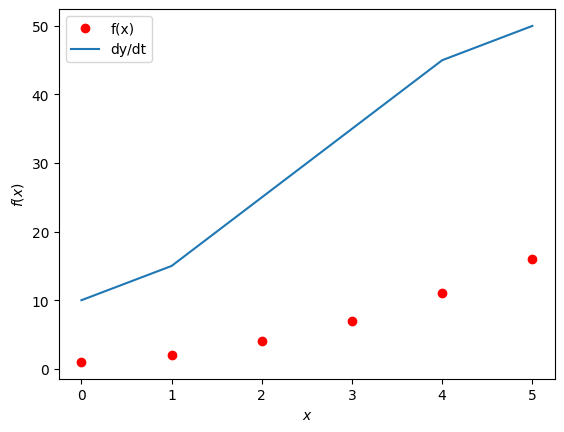

In [ ]:
# Definimos el array de puntos de la función f(x)
f = np.array([1, 2, 4, 7, 11, 16])
h = 0.1  # Espaciado entre puntos
derivada_f = np.gradient(f, h)

plt.plot(f, 'ro', label='f(x)')
plt.plot(derivada_f, label='dy/dt')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.show()

## Método `numpy.diff`

El método [`diff`](https://numpy.org/doc/2.1/reference/generated/numpy.diff.html) calcula la diferencia entre elementos consecutivos de un array, proporcionando una forma simple de calcular diferencias finitas. Aunque no calcula directamente la derivada, puede usarse para aproximarla dividiendo por el espaciado entre puntos.

**Sintaxis:**

```python
numpy.diff(a, n=1, axis=-1)
```

**Parámetros:**
- `a`: Array de entrada.
- `n`: (Opcional) Orden de la diferencia. Por defecto, `n=1`.
- `axis`: (Opcional) Eje a lo largo del cual calcular las diferencias.

**Ejemplo:**

Si tenemos un array `f` de valores de la función y un espaciado $h$, la derivada se puede aproximar así:

$$
f'(x) ≈ \frac{f(x + h) - f(x)}{h}
$$




In [ ]:
# Array de puntos de la función f(x)
f = np.array([1, 2, 4, 7, 11, 16])
h = 0.1  # Espaciado entre puntos
derivada_f = np.diff(f) / h

print(derivada_f)

[10. 20. 30. 40. 50.]


## Diferencias entre `gradient` y `diff`

1. **`gradient`** usa diferencias centradas para puntos intermedios y diferencias hacia adelante o hacia atrás para los extremos, proporcionando una aproximación más precisa para el gradiente en todo el dominio de los datos.
2. **`diff`** calcula solo diferencias finitas hacia adelante entre puntos consecutivos, devolviendo un array con un elemento menos que el array de entrada.

## Comparación

### gradient:

* Mantiene la misma longitud que el arreglo original
* Más preciso para puntos interiores (error O(h²))
* Mejor para funciones suaves


### diff:

* Reduce la longitud del arreglo en 1
* Menos preciso (error O(h))
* Más simple y directo
* Útil cuando solo se necesitan diferencias entre puntos consecutivos